In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [304]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [305]:
for i in range(data.shape[0]):
    if data.loc[i, 'price_change'] == -1:
        data.loc[i, 'price_change'] = 0

In [306]:
target = 'price_change'

train = data.sample(frac=0.7, random_state=1)
test = data.drop(train.index).sample(frac=1.0, random_state=1)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [307]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [308]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(hidden_layer_sizes=(1395, 40, 40, 40, 2), solver='adam',
                       activation='logistic', max_iter=2500, random_state=9043)
modelo.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo.predict(x_test)

print("Accuracy: {:.4f}".format(accuracy_score(y_pred=y_pred, y_true=y_test)))
print("Precision: {:.4f}".format(precision_score(y_pred=y_pred, y_true=y_test)))
print("Recall: {:.4f}".format(recall_score(y_pred=y_pred, y_true=y_test)))
print("F1 Score: {:.4f}".format(f1_score(y_pred=y_pred, y_true=y_test)))

Accuracy: 0.6271
Precision: 0.5556
Recall: 0.6000
F1 Score: 0.5769


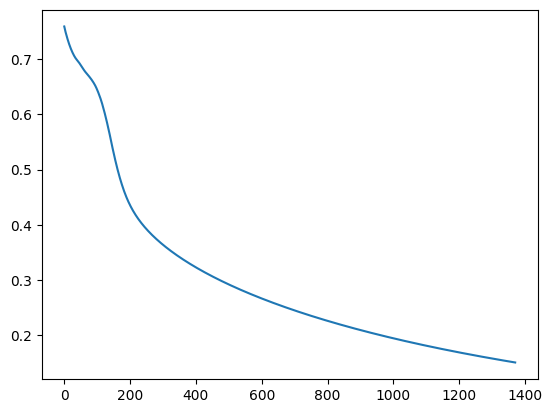

In [ ]:
plt.plot(modelo.loss_curve_)

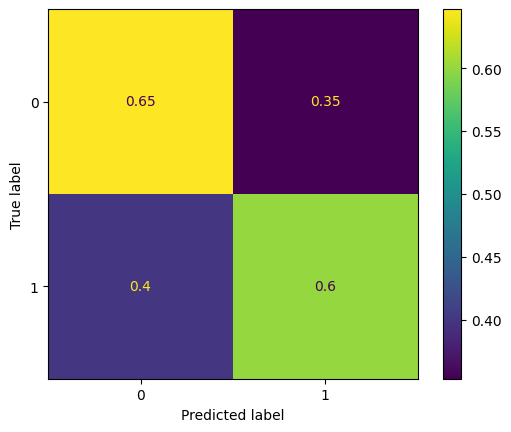

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')